<h1 align = 'center'><B><U>CSCN8000</U> - <U>Artficial Intelligence Algorithm</U></B></h1>
<h2 align = 'center'><B><U>Assignment</U> - <U>3</U></B></h2>
<h3 align = 'center'><B><I>Waseem Iqbal Shaikh(8902834)</I></B></h3>

- Importing the necessary packages:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

- Loading the iris dataset in a dataframe:

In [11]:
iris = load_iris()
data = iris.data[:, 2:4]

- Exploring the data:

In [12]:
data_df = pd.DataFrame(data, columns=['petal width', 'petal length'])
data_df.head(5)

,petal width,petal length
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


- Scaling the data:

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

- Using elbow method to find optimal number of clusters:

In [14]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

- Plotting the elbow curve:

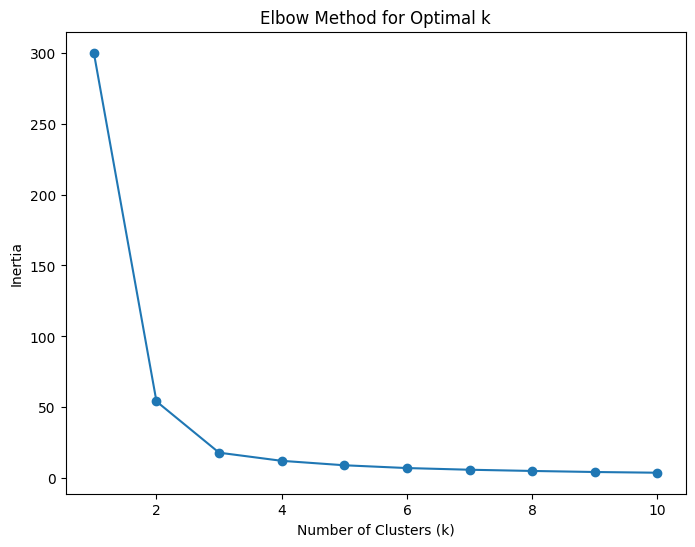

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

- Loading the heart dataset in dataframe:

In [17]:
heart_data = pd.read_csv('heart.csv')
heart_data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
categorical_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
heart_data = pd.get_dummies(heart_data, columns=categorical_columns)

- Removing outliers using Z-score:

In [22]:
z_scores = np.abs((heart_data - heart_data.mean()) / heart_data.std())
heart_data = heart_data[(z_scores < 3).all(axis=1)]

In [24]:
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.